In [27]:
#Import library yang digunakan pada proses preprocessing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
import seaborn as sns

### IMPORT DATA

In [28]:
#Import Data dari data train yang sudah diberikan
df = pd.read_csv('Dataset/kendaraan_train.csv')
df.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [29]:
#Menampilkan deskripsi tiap kolom
df.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### DROP DUPLICATE DATA

In [30]:
#Cek duplicate data
df.duplicated().sum()

0

In [31]:
#Membuang data yang duplikat
df.drop_duplicates(keep=False,inplace=True)
df.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


### CEK DATA YANG HILANG

In [32]:
#Cek apakah terdapat data yang hilang pada pada data train
df.isna().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

### MENGISI MISSING VALUES

In [33]:
#Mengubah dataframe menjadi array list
x = df.values
#Mendefinisikan startegi yang digunakan untuk mengisi value yang hilang, disini menggunakan mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[:, 2:3])
x[:, 2:3] = imputer.transform(x[:, 2:3])
imputer.fit(x[:, 8:-1])
x[:, 8:-1] = imputer.transform(x[:, 8:-1])
#Mengubah list array menjadi dataframe
names = df.columns
df = pd.DataFrame(x, columns=names)
#Mengisi missing value dengan strategi modus, atau value yang sering muncul
df = df.fillna(df.mode().iloc[0])
df.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,Pria,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,Pernah,34857.0,88.0,194.0,0


In [34]:
#Mengecek apakah masih terdapat data yang hilang
df.isna().sum()

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

### ENCODE CATEGORICAL DATA

In [35]:
#Mendefinisikan labelEncoder
le = preprocessing.LabelEncoder()
#Membuat fungsi untuk mengubah kategorikal data menjadi numerik
def encode(type, change):
  df[type] = le.fit_transform(df[type])
  df[type] = df[type].replace(change, np.NaN)

#Memanggil fungsi encode, dengan memasukkan nama kolom dan jumlah jenis value yang akan diubah pada kolom
encode('Jenis_Kelamin', 2)
encode('Umur_Kendaraan', 3)
encode('Kendaraan_Rusak', 2)
df.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,1,30.0,1.0,33.0,1.0,1,1,28029.0,152.0,97.0,0
1,2,0,48.0,1.0,39.0,0.0,2,0,25800.0,29.0,158.0,0
2,3,0,21.0,1.0,46.0,1.0,1,1,32733.0,160.0,119.0,0
3,4,1,58.0,1.0,48.0,0.0,0,1,2630.0,124.0,63.0,0
4,5,0,50.0,1.0,35.0,0.0,2,0,34857.0,88.0,194.0,0


### HANDLE OUTLIER

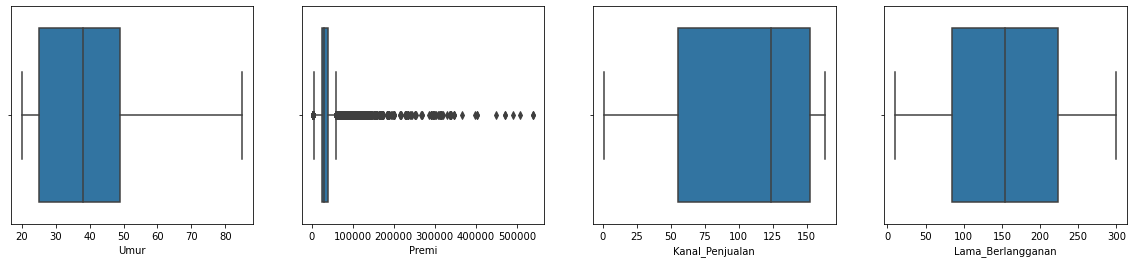

In [36]:
#Membuat boxplot untuk mengetahui apakah ada outlier atau tidak
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(20,4))
sns.boxplot(x='Umur',data=df, ax=ax[0])
sns.boxplot(x='Premi',data=df, ax=ax[1])
sns.boxplot(x='Kanal_Penjualan',data=df, ax=ax[2])
sns.boxplot(x='Lama_Berlangganan',data=df, ax=ax[3])
plt.show()


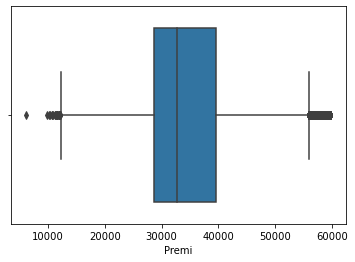

In [37]:
#Mendefinisikan q1, q3, dan interquartile
q1 = df['Premi'].quantile(0.25)
q3 = df['Premi'].quantile(0.75)
iqr = q3 - q1

#Mencari lower bound dan upper bound
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

df = df[~((df['Premi'] < lower_bound) | (df['Premi'] > upper_bound))]

#Memvisualisasikan data yang outliernya sudah dihapus tadi
sns.boxplot(x='Premi', data=df)
plt.show()

### NORMALIZE DATA

In [38]:
#Normalisasi data menggunakan metode minmax scaller
names = df.columns
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(df)
df = pd.DataFrame(d, columns=names)
df.head()


,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.000000,1.0,0.153846,1.0,0.634615,1.0,0.5,1.0,0.409000,0.932099,0.301038,0.0
1,0.000003,0.0,0.430769,1.0,0.750000,0.0,1.0,0.0,0.367431,0.172840,0.512111,0.0
2,0.000007,0.0,0.015385,1.0,0.884615,1.0,0.5,1.0,0.496727,0.981481,0.377163,0.0
3,0.000014,0.0,0.461538,1.0,0.673077,0.0,1.0,0.0,0.536338,0.537037,0.636678,0.0
4,0.000017,0.0,0.015385,1.0,0.673077,1.0,0.5,1.0,0.310270,0.932099,0.557093,0.0


### EXPORT DATA CLEAN

In [39]:
#Export data yang sudah selesai pada tahapan preprocessing yang telah dilakukan
df.to_csv('Dataset/kendaraan_train_clean.csv', index=False)